# Imports

In [2]:
import pickle
import pandas as pd
import numpy as np
from numpy import mean

# identification of ARIMA parameters
from statsmodels.tsa.stattools import acf, pacf # choose p and q

# plotting
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
plt.rcParams['figure.figsize'] = [20, 10]

# custom functions
import sys
sys.path.append(r"C:\Users\User\Documents\projects\LHL_final_project_influenza_forecasting\src")
from evaluate_model import *
from ADF import *
from arima_model import *

# Datasets

In [15]:
df_flu_pre_COVID = pickle.load(open(r"..\data\flu_cases\df_flu_pre_COVID_total.pkl", "rb" ))

In [18]:
df_flu_pre_COVID = df_flu_pre_COVID[-183:]

In [19]:
df_flu_pre_COVID

,Total Cases
Week Ending,
2016-09-03,2.0
2016-09-10,18.0
2016-09-17,23.0
2016-09-24,44.0
2016-10-01,63.0
...,...
2020-02-01,4789.0
2020-02-08,4654.0
2020-02-15,3989.0


In [20]:
train_size = int(len(df_flu_pre_COVID) *.7)
test_size = len(df_flu_pre_COVID) - train_size
train, test = df_flu_pre_COVID[0:train_size], df_flu_pre_COVID[train_size:len(df_flu_pre_COVID)]

In [31]:
test

,Total Cases
Week Ending,
2019-02-16,1521.0
2019-02-23,1558.0
2019-03-02,1734.0
2019-03-09,1759.0
2019-03-16,1634.0
2019-03-23,1625.0
2019-03-30,1621.0
2019-04-06,1593.0
2019-04-13,1548.0


# Choosing ARIMA Parameters

In [21]:
# test for stationarity - choose d
test_stationarity(df_flu_pre_COVID)

Results of Dickey-Fuller Test:
Test Statistic                  -4.279900
p-value                          0.000481
#Lags Used                       5.000000
Number of Observations Used    177.000000
Critical Value (1%)             -3.467845
Critical Value (5%)             -2.878012
Critical Value (10%)            -2.575551
dtype: float64


In [22]:
d = 0 # time series is stationary, so don't need to apply differencing

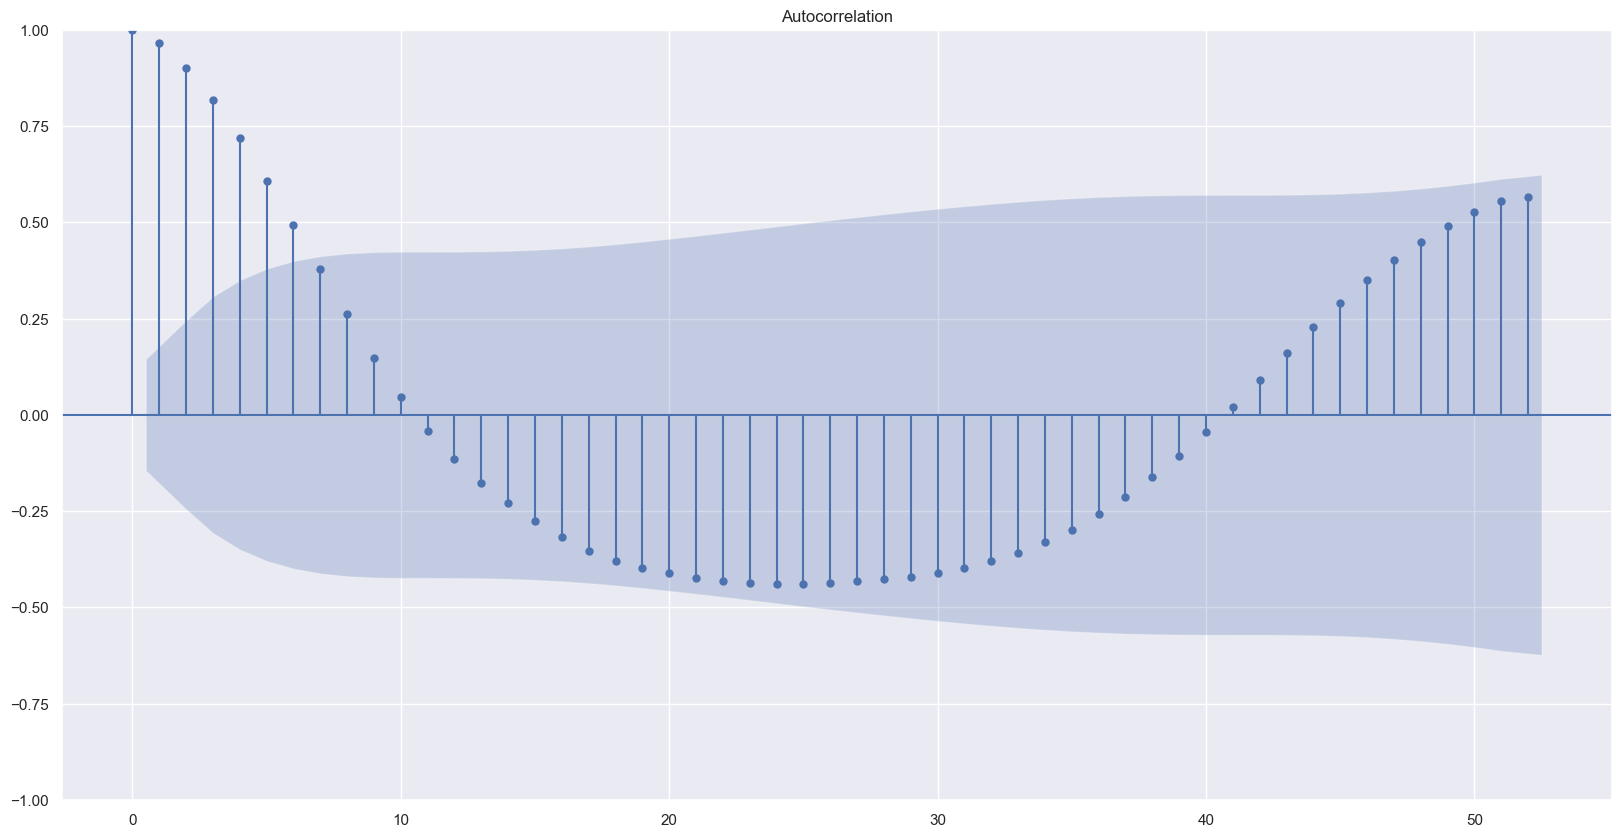

In [23]:
# plot acf and specify the number of lags - choose q
sm.graphics.tsa.plot_acf(df_flu_pre_COVID, lags=52)
plt.show()

In [7]:
q = 6

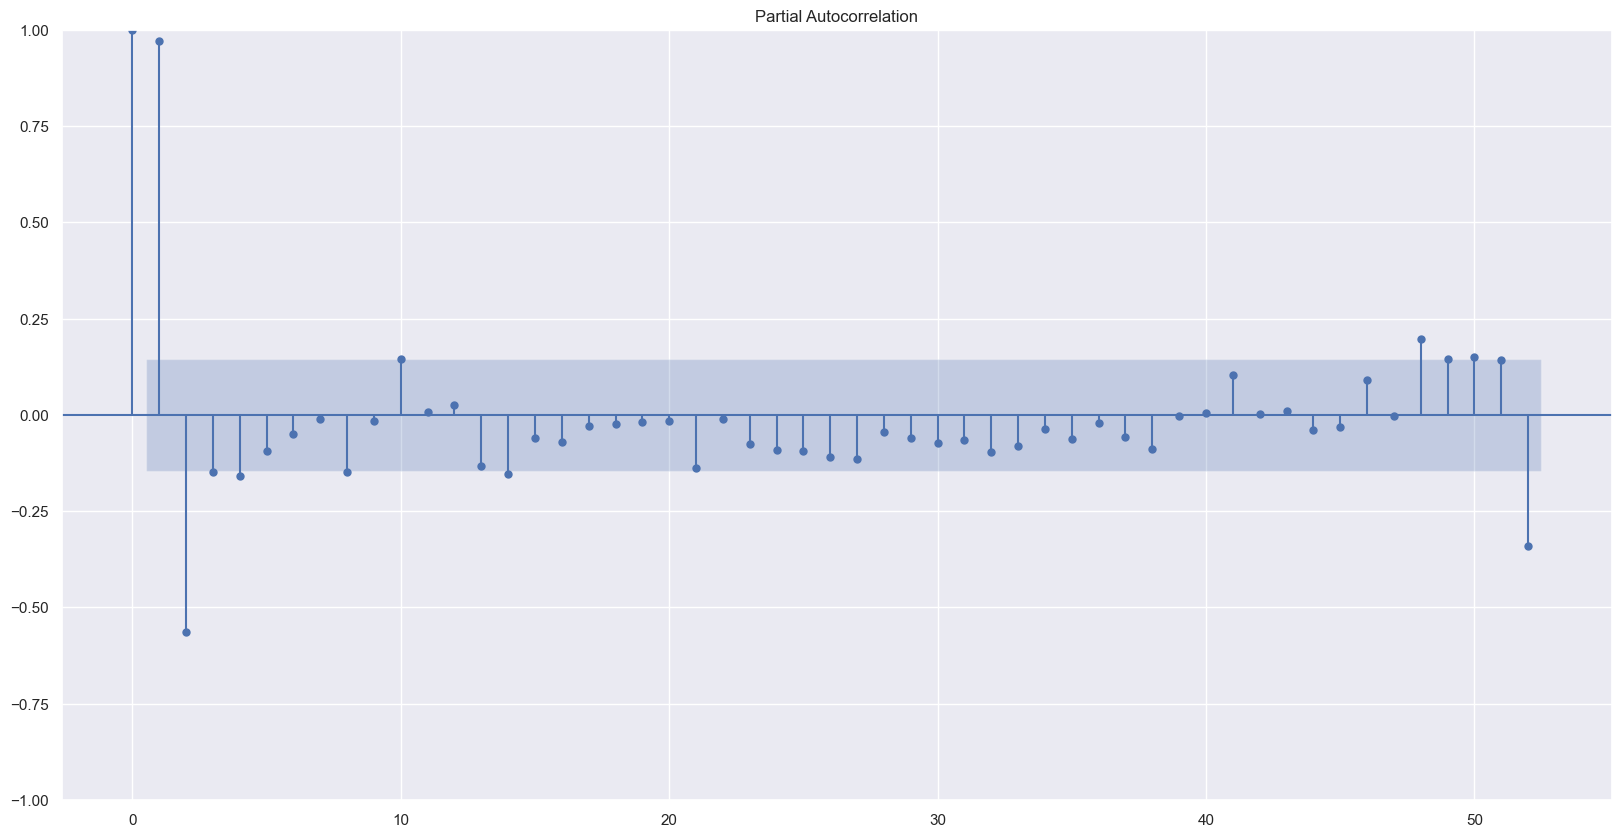

In [25]:
# plot pacf and specify the number of lags - choose p
sm.graphics.tsa.plot_pacf(df_flu_pre_COVID, lags=52)
plt.show()

In [26]:
p = 2

# ARIMA - Pre-COVID

In [27]:
print(len(train))
print(len(test))

128
55


In [28]:
# Instantiate model
model = ARIMA(train, order=(p,d,q), freq='W-SAT')

# Fit model
fitted_model = model.fit()
print(f'Fitted model summary: \n{fitted_model.summary()}')

# Forecast
forecast = fitted_model.forecast(steps=4)
print(f'Forecast: \n{forecast}')

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SAT will be used.
  self._init_dates(dates, freq)


Fitted model summary: 
                               SARIMAX Results                                
Dep. Variable:            Total Cases   No. Observations:                  128
Model:                 ARIMA(2, 0, 6)   Log Likelihood                -873.227
Date:                Fri, 02 Dec 2022   AIC                           1766.453
Time:                        00:00:47   BIC                           1794.973
Sample:                    09-03-2016   HQIC                          1778.041
                         - 02-09-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1040.7534    712.694      1.460      0.144    -356.101    2437.608
ar.L1          1.7565      0.224      7.834      0.000       1.317       2.196
ar.L2         -0.8115      0.

In [34]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd

dta = train
# dta.index = pd.date_range(start='1700', end='2009', freq='A')
res = sm.tsa.ARIMA(dta, (3, 0, 6)).fit()
fig, ax = plt.subplots()
ax = dta.loc['2016-09-03':].plot(ax=ax)
fig = res.plot_predict('2019-02-16', '2020-02-29', dynamic=True, ax=ax,
                       plot_insample=False)
plt.show()

ValueError: endog and exog matrices are different sizes

TypeError: cannot do slice indexing on DatetimeIndex with these indexers [Total Cases    1759.0
Name: 2019-03-09 00:00:00, dtype: float64] of type Series

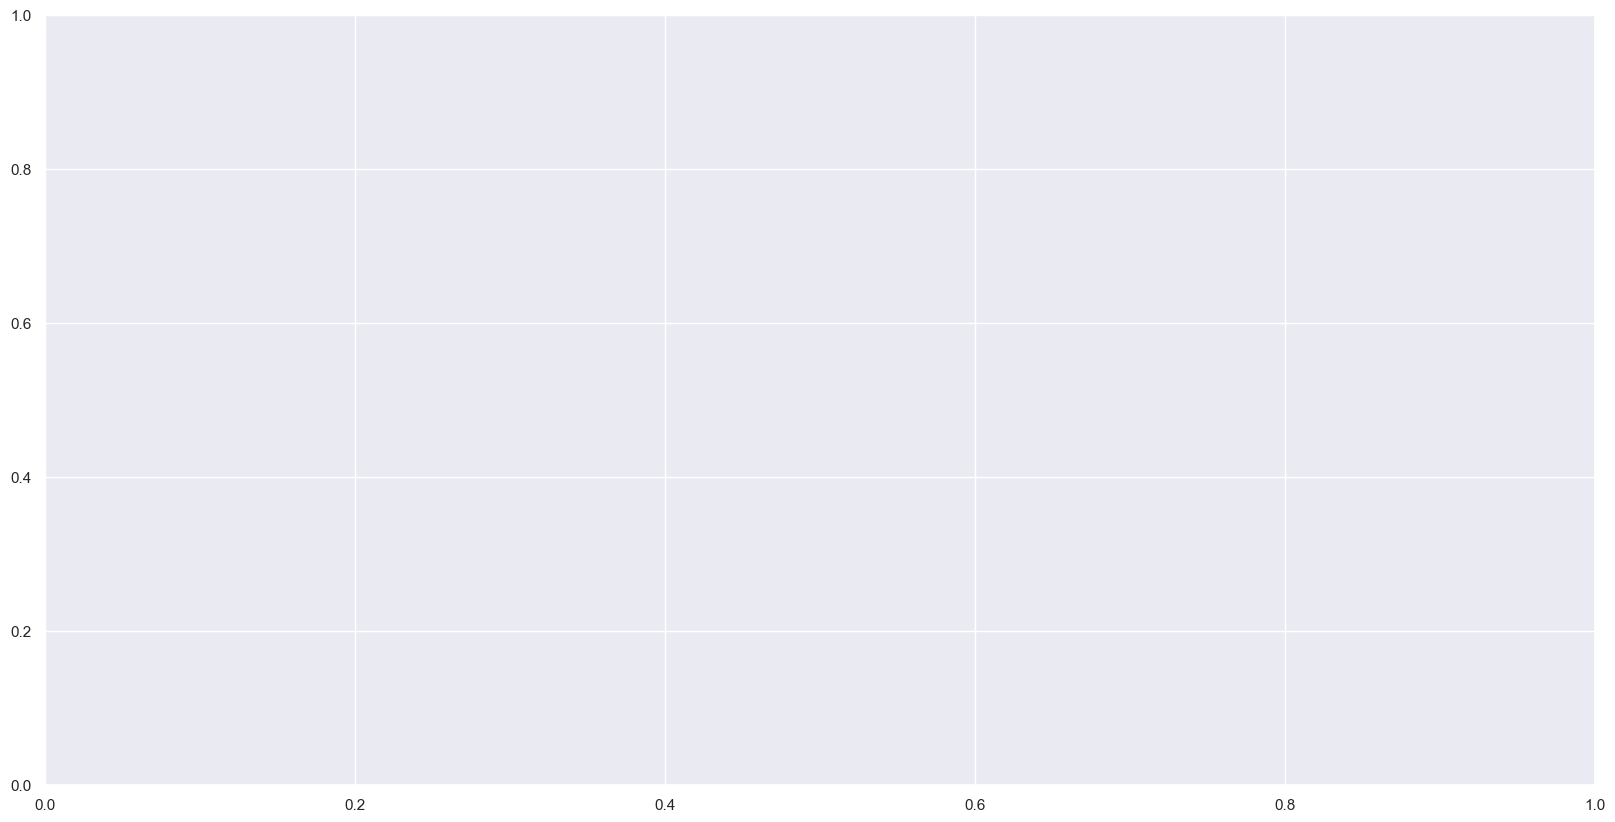

In [30]:
# Plot forecast
fig, ax = plt.subplots()
forecast_start = df_flu_pre_COVID.iloc[-4]
plot_start = df_flu_pre_COVID.iloc[-52]
stop = df_flu_pre_COVID.iloc[-1]
ax = df_flu_pre_COVID[plot_start:stop].plot(ax=ax)
plot_predict(fitted_model, forecast_start, stop, ax=ax)
plt.show()